In [27]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [70]:
t_vals = []
std_err = []
for i in ('ing-1', 'ing-2', 'ing-4', 'ing-10'):
    f_name = 'single/' + i
    data = genfromtxt(f_name, delimiter=',')
    t_vals.append(np.mean(data[:,1]))
    std_err.append(np.std(data[:,1]))
print(t_vals)
print(std_err)

[15124.561913043481, 14067.451531250001, 11319.321147058821, 5223.2803076923074]
[575.7284573835974, 491.78347410089839, 1003.4620845147925, 717.25432510333724]


In [25]:
fig,ax = plt.subplots(figsize=(8,4))
plt.plot((1,2,4,10), t_vals, marker='o', color='dodgerblue')
pylab.xlabel('Ingester Count', fontsize=12)
pylab.ylabel('Throughput', fontsize=12)
#plt.savefig('single_sketchlet.pdf', dpi=300)
#plt.close()

In [69]:
l_vals = []
l_std_err = []
l_95p = []
for i in ('lat-1', 'lat-2', 'lat-4', 'lat-10'):
    f_name = 'single/' + i
    data = genfromtxt(f_name, delimiter=',')
    l_vals.append(np.mean(data[:]))
    l_std_err.append(np.std(data[:]))
    l_95p.append(np.percentile(data[:], 95))
print(l_vals)
print(l_std_err)
print('95th - ', l_95p)
#fig,ax = plt.subplots(figsize=(8,4))
#plt.plot((1,4,10), l_vals, marker='o', color='dodgerblue')
#pylab.xlabel('Ingester Count', fontsize=12)
#pylab.ylabel('Latency(nano seconds)', fontsize=12)
#plt.savefig('single_sketchlet_latency.pdf', dpi=300)
#plt.close()

[64752.413043478264, 64971.288659793812, 74025.648148148146, 81034.037735849051]
[5503.0067930339401, 4012.3580283423557, 3124.5696898246078, 2501.9290441521784]
95th -  [67175.25, 71170.199999999997, 78364.100000000006, 85842.399999999994]


In [53]:
# cluster analysis
cluster_t_m = []
cluster_t_std = []
for i in ('ing-1', 'ing-2', 'ing-4', 'ing-10'):
    f_name = 'cluster/' + i + '.stat'
    data = genfromtxt(f_name, delimiter=',')
    cluster_t_m.append(np.mean(data[:,1]))
    cluster_t_std.append(np.std(data[:,1]))
print(cluster_t_m)
print(cluster_t_std)

[44082.475824074078, 44060.888867724861, 41645.316785714291, 38369.745315589353]
[5984.5031675903483, 6206.2079346787941, 13553.462254036856, 14008.307775281077]


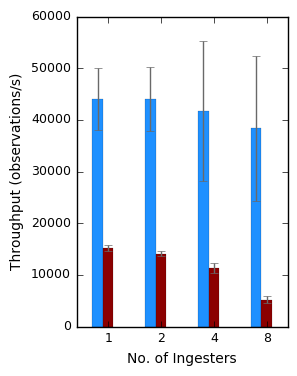

In [57]:
ind = np.arange(1,5)
width = 0.2

fig2 = plt.figure(figsize=(6, 4))
ax2 = plt.subplot(1,2,1)
leg_with = plt.bar(ind - 1 *width, cluster_t_m, width, yerr=cluster_t_std, color='dodgerblue', linewidth=0.1, ecolor='dimgrey')
leg_without = plt.bar(ind, t_vals, width, yerr=std_err, color='darkred', linewidth=0.1, ecolor='dimgrey')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels((1, 2, 4, 8))
# add some text for labels, title and axes ticks
pylab.ylabel('Throughput (observations/s)', fontsize=10)
pylab.xlabel('No. of Ingesters', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.tick_params(axis='both', which='minor', labelsize=8)
